In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define symbolic variables for joint angles, velocities, and accelerations
theta1, theta2, theta3, theta4, theta5 = sp.symbols('theta1 theta2 theta3 theta4 theta5')
dtheta1, dtheta2, dtheta3, dtheta4, dtheta5 = sp.symbols('dtheta1 dtheta2 dtheta3 dtheta4 dtheta5')
ddtheta1, ddtheta2, ddtheta3, ddtheta4, ddtheta5 = sp.symbols('ddtheta1 ddtheta2 ddtheta3 ddtheta4 ddtheta5')
t = sp.symbols('t')

In [4]:
# Define joint angles as functions of time
theta1_t = sp.Function('theta1')(t)
theta2_t = sp.Function('theta2')(t)
theta3_t = sp.Function('theta3')(t)
theta4_t = sp.Function('theta4')(t)
theta5_t = sp.Function('theta5')(t)

# DH Parameters
d1, a1, alpha1 = 0.1, 0, sp.pi / 2
d2, a2, alpha2 = 0, 0.5, 0
d3, a3, alpha3 = 0, 0.5, 0
d4, a4, alpha4 = 0, 0, sp.pi / 2
d5, a5, alpha5 = 0.1, 0, 0

# Mass and inertia properties
m1, m2, m3, m4, m5 = sp.symbols('m1 m2 m3 m4 m5')
I1, I2, I3, I4, I5 = sp.symbols('I1 I2 I3 I4 I5')
g = 9.81

In [5]:
# Define the transformation matrix using DH parameters
def DH_matrix(theta, d, a, alpha):
    return sp.Matrix([
        [sp.cos(theta), -sp.sin(theta) * sp.cos(alpha), sp.sin(theta) * sp.sin(alpha), a * sp.cos(theta)],
        [sp.sin(theta), sp.cos(theta) * sp.cos(alpha), -sp.cos(theta) * sp.sin(alpha), a * sp.sin(theta)],
        [0, sp.sin(alpha), sp.cos(alpha), d],
        [0, 0, 0, 1]
    ])

In [6]:
# Transformation matrices for each link
T1 = DH_matrix(theta1_t, d1, a1, alpha1)
T2 = DH_matrix(theta2_t, d2, a2, alpha2)
T3 = DH_matrix(theta3_t, d3, a3, alpha3)
T4 = DH_matrix(theta4_t, d4, a4, alpha4)
T5 = DH_matrix(theta5_t, d5, a5, alpha5)

In [7]:

T01 = T1
T02 = T01 * T2
T03 = T02 * T3
T04 = T03 * T4
T05 = T04 * T5

# Position vectors of the centers of mass
p1 = T01[:3, 3] / 2
p2 = T02[:3, 3] / 2
p3 = T03[:3, 3] / 2
p4 = T04[:3, 3] / 2
p5 = T05[:3, 3] / 2

# Velocity of the centers of mass
v1 = p1.diff(t)
v2 = p2.diff(t)
v3 = p3.diff(t)
v4 = p4.diff(t)
v5 = p5.diff(t)

# Kinetic Energy
K1 = 0.5 * m1 * v1.dot(v1) + 0.5 * I1 * (theta1_t.diff(t))**2
K2 = 0.5 * m2 * v2.dot(v2) + 0.5 * I2 * (theta2_t.diff(t))**2
K3 = 0.5 * m3 * v3.dot(v3) + 0.5 * I3 * (theta3_t.diff(t))**2
K4 = 0.5 * m4 * v4.dot(v4) + 0.5 * I4 * (theta4_t.diff(t))**2
K5 = 0.5 * m5 * v5.dot(v5) + 0.5 * I5 * (theta5_t.diff(t))**2

K = K1 + K2 + K3 + K4 + K5

# Potential Energy
P1 = m1 * g * p1[2]
P2 = m2 * g * p2[2]
P3 = m3 * g * p3[2]
P4 = m4 * g * p4[2]
P5 = m5 * g * p5[2]

P = P1 + P2 + P3 + P4 + P5

# Lagrangian
L = K - P

In [8]:

# Euler-Lagrange equations
EL1 = sp.diff(sp.diff(L, theta1_t.diff(t)), t) - sp.diff(L, theta1_t)
EL2 = sp.diff(sp.diff(L, theta2_t.diff(t)), t) - sp.diff(L, theta2_t)
EL3 = sp.diff(sp.diff(L, theta3_t.diff(t)), t) - sp.diff(L, theta3_t)
EL4 = sp.diff(sp.diff(L, theta4_t.diff(t)), t) - sp.diff(L, theta4_t)
EL5 = sp.diff(sp.diff(L, theta5_t.diff(t)), t) - sp.diff(L, theta5_t)

# Simplify the expressions for torques
tau1 = sp.simplify(EL1)
tau2 = sp.simplify(EL2)
tau3 = sp.simplify(EL3)
tau4 = sp.simplify(EL4)
tau5 = sp.simplify(EL5)

# Display the symbolic torques
tau1, tau2, tau3, tau4, tau5

(I1*Derivative(theta1(t), (t, 2)) + 0.03125*m2*(-2*sin(2*theta2(t))*Derivative(theta1(t), t)*Derivative(theta2(t), t) + cos(2*theta2(t))*Derivative(theta1(t), (t, 2)) + Derivative(theta1(t), (t, 2))) + 0.0625*m3*(cos(theta2(t) + theta3(t)) + cos(theta2(t)))*(-2*sin(theta2(t) + theta3(t))*Derivative(theta1(t), t)*Derivative(theta2(t), t) - 2*sin(theta2(t) + theta3(t))*Derivative(theta1(t), t)*Derivative(theta3(t), t) - 2*sin(theta2(t))*Derivative(theta1(t), t)*Derivative(theta2(t), t) + cos(theta2(t) + theta3(t))*Derivative(theta1(t), (t, 2)) + cos(theta2(t))*Derivative(theta1(t), (t, 2))) + 0.0625*m4*(cos(theta2(t) + theta3(t)) + cos(theta2(t)))*(-2*sin(theta2(t) + theta3(t))*Derivative(theta1(t), t)*Derivative(theta2(t), t) - 2*sin(theta2(t) + theta3(t))*Derivative(theta1(t), t)*Derivative(theta3(t), t) - 2*sin(theta2(t))*Derivative(theta1(t), t)*Derivative(theta2(t), t) + cos(theta2(t) + theta3(t))*Derivative(theta1(t), (t, 2)) + cos(theta2(t))*Derivative(theta1(t), (t, 2))) - 0.0312

In [9]:

# Numerical values for the simulation
m_values = {m1: 1.0, m2: 1.0, m3: 1.0, m4: 1.0, m5: 1.0}
I_values = {I1: 0.1, I2: 0.1, I3: 0.1, I4: 0.1, I5: 0.1}
angle_values = np.linspace(0, np.pi, 360)
torque1_vals = []
torque2_vals = []
torque3_vals = []
torque4_vals = []
torque5_vals = []

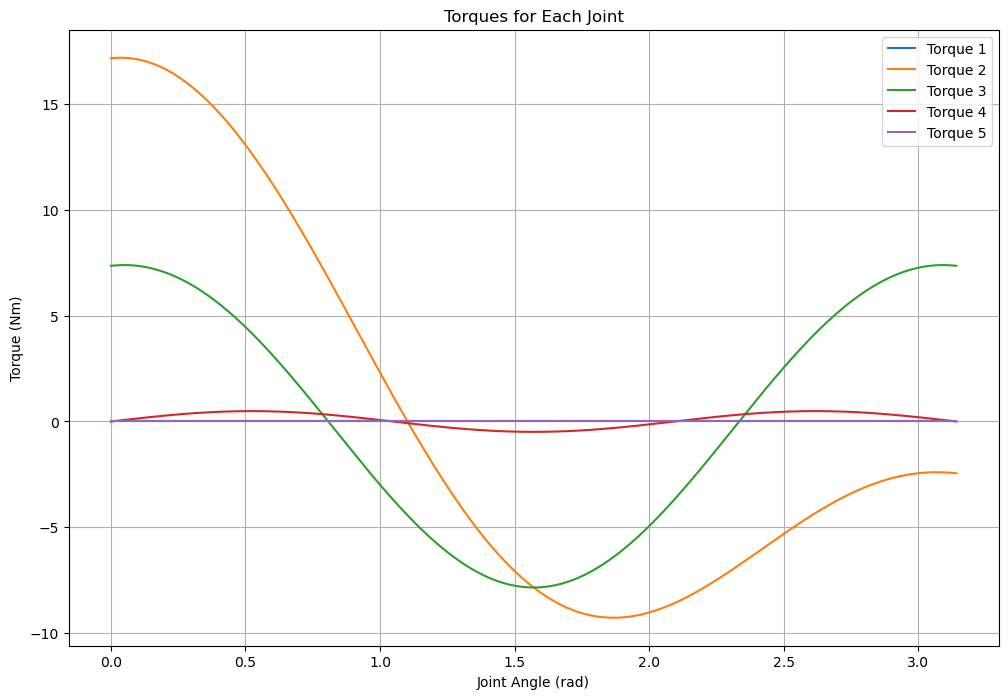

In [10]:

# Evaluate torques numerically
for angle in angle_values:
    subs = {
        theta1_t: angle, theta2_t: angle, theta3_t: angle, theta4_t: angle, theta5_t: angle,
        theta1_t.diff(t): 0, theta2_t.diff(t): 0, theta3_t.diff(t): 0, theta4_t.diff(t): 0, theta5_t.diff(t): 0,
        theta1_t.diff(t, t): 0, theta2_t.diff(t, t): 0, theta3_t.diff(t, t): 0, theta4_t.diff(t, t): 0, theta5_t.diff(t, t): 0
    }
    subs.update(m_values)
    subs.update(I_values)
    
    tau1_num = tau1.subs(subs).evalf()
    tau2_num = tau2.subs(subs).evalf()
    tau3_num = tau3.subs(subs).evalf()
    tau4_num = tau4.subs(subs).evalf()
    tau5_num = tau5.subs(subs).evalf()
    
    torque1_vals.append(float(tau1_num))
    torque2_vals.append(float(tau2_num))
    torque3_vals.append(float(tau3_num))
    torque4_vals.append(float(tau4_num))
    torque5_vals.append(float(tau5_num))

# Plot the torques over the range of motion
plt.figure(figsize=(12, 8))
plt.plot(angle_values, torque1_vals, label='Torque 1')
plt.plot(angle_values, torque2_vals, label='Torque 2')
plt.plot(angle_values, torque3_vals, label='Torque 3')
plt.plot(angle_values, torque4_vals, label='Torque 4')
plt.plot(angle_values, torque5_vals, label='Torque 5')
plt.xlabel('Joint Angle (rad)')
plt.ylabel('Torque (Nm)')
plt.title('Torques for Each Joint')
plt.legend()
plt.grid(True)
plt.show()